<a href="https://colab.research.google.com/github/sreejagundu/NASA/blob/master/Carbonfootprint%20with%20solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What Is Our Carbon Footprint?**

![alt text](https://energyindustryreview.com/wp-content/uploads/2018/12/Romania-limits-its-GHG-emissions-in-the-absence-of-large-industrial-platforms.jpg)

Today, the term “carbon footprint” is often used as shorthand for the amount of carbon (usually in tonnes) is emitted by an activity or organization. The carbon footprint is also an important component of the Ecological Footprint, since it is one competing demand for biologically productive space. Carbon emissions from burning fossil fuel accumulate in the atmosphere if there is not enough bio capacity dedicated to absorb these emissions. Therefore, when the carbon footprint is reported within the context of the total Ecological Footprint, the tonnes of carbon dioxide emissions are expressed as the amount of productive land area required to sequester those carbon dioxide emissions. This tells us how much bio capacity is necessary to neutralize the emissions from burning fossil fuels.

The amount of GHGs released into the atmosphere by any particular human activity is known as the carbon footprint. This footprint can be defined across an individual, a family, an organization or group, or an entire nation. It is usually measured as tons of carbon dioxide (CO2) emitted per year, a number that can be supplemented by tons of CO2-equivalent gases, including methane (CH4) and other greenhouse gases.

Carbon dioxide, methane, and other greenhouse gases (GHGs) are an important input to the global radiation budget, which strongly impacts the past, present, and future climate. These gases are exchanged between the atmosphere, ocean (through dissolution of carbon gases), and plants (through photosynthesis and respiration). They are also emitted by human activities, such as burning of fossil fuels, clearing land for agricultural purposes, producing and consuming food, manufacturing goods, materials, buildings, and roads, and by the transportation sector.

## **Why We Choose This Topic**

The major issue that we are facing today is increase in green house gas emissions. It is causing climatic variations. 

We chose this topic so that we find a solution for carbon footprint to build a clean and green atmosphere.

## **Challenge**

Your challenge is to identify local sources of carbon emissions and/or estimate amounts of carbon emissions for different human activities to aid scientists in mapping carbon sources and sinks. How can you inform decisions to adapt to the consequences of a changing world and aid policy makers in making plans for the future?

### Sources of GHG

![alt](https://www.epa.gov/sites/production/files/2016-05/global_emissions_sector_2015.png)

Global greenhouse gas emissions can also be broken down by the economic activities that lead to their production.

Electricity and Heat Production:-
The burning of coal, natural gas, and oil for electricity and heat is the largest single source of global greenhouse gas emissions.

Industry:-
Greenhouse gas emissions from industry primarily involve fossil fuels burned on site at facilities for energy.

Forestry:-
Greenhouse gas emissions from this sector come mostly from agriculture (cultivation of crops and livestock) and deforestation.

Transportation:-
Greenhouse gas emissions from this sector primarily involve fossil fuels burned for road, rail, air, and marine transportation.

Building:-
Greenhouse gas emissions from this sector arise from onsite energy generation and burning fuels for heat in buildings or cooking in homes.

Other Energy:-
This source of greenhouse gas emissions refers to all emissions from the Energy sector which are not directly associated with electricity or heat production, such as fuel extraction, refining, processing, and transportation.

### Data Analysis

![alt](https://www.epa.gov/sites/production/files/2016-05/global_emissions_gas_2015.png)



*   Fossil fuel use is the primary source of CO2. CO2 can also be emitted from direct human-induced impacts on forestry and other land use, such as through deforestation, land clearing for agriculture, and degradation of soils.
*   Agricultural activities, waste management, energy use, and biomass burning all contribute to CH4 emissions.


*   Agricultural activities, such as fertilizer use, are the primary source of N2O emissions. Fossil fuel combustion also generates N2O.
*   Industrial processes, refrigeration, and the use of a variety of consumer products contribute to emissions of F-gases, which include hydrofluorocarbons (HFCs), perfluorocarbons (PFCs), and sulfur hexafluoride (SF6).

*   Black carbon is a solid particle or aerosol, not a gas, but it also contributes to warming of the atmosphere.


### Global Map of the CO2 column-averaged volume mixing ratios in 2.5 deg by 2.5 deg mesh(FTS SWIR L2 XCO2)

![alt](https://data2.gosat.nies.go.jp/gallery/v0291/XCO2_L2_202008010831average_v02.91.png)

## Data

We have used labeled data https://github.com/NASA-IMPACT/space-apps/tree/master/data/labeled  from NASA data resources.

In [ ]:
from google.colab import files
data_load = files.upload()

Saving PM2.5_dataset.csv to PM2.5_dataset.csv


Monitoring surface air quality helps ensure the protection of human health and property. However, surface air quality data is sparsely monitored. To help fill in these gaps, inferences are derived from other sources including remote sensing. The CSV formatted data and labels are provided below. It contains the following fields which have been described.

air_data_value: EPA air data PM2.5 readings

RH: relative humidity from HRRR

UGRD, VGRD: Wind speed vectors from HRRR

HPBL: Height of Planetary Boundary Layer from HRRR

TMP: Temperature recorded from HRRR

goes_measurement: AOD reading from GOES R

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('PM2.5_dataset.csv')
df.head()   # displays top 5 rows

,Unnamed: 0,station_id,stime,air_data_value,RH,UGRD,VGRD,HPBL,TMP,goes_measurement
0,0,06-011-0007,2019-01-02 20:00:00,17.0,31.600000,-2.106623,-1.797583,256.61905,282.8188,-0.005922
1,1,06-019-0500,2019-01-02 20:00:00,13.0,62.200000,1.205877,1.764917,337.49405,281.6313,0.087090
2,2,06-061-0003,2019-01-02 20:00:00,21.0,61.500000,1.518377,1.014917,270.61905,280.1313,0.094333
3,3,06-073-1201,2019-01-02 20:00:00,6.0,15.400001,2.080877,-1.610083,1009.30660,288.1938,-0.024185
4,4,06-079-2004,2019-01-02 20:00:00,7.0,50.700000,2.393377,-1.172583,460.43155,285.1938,-0.014013


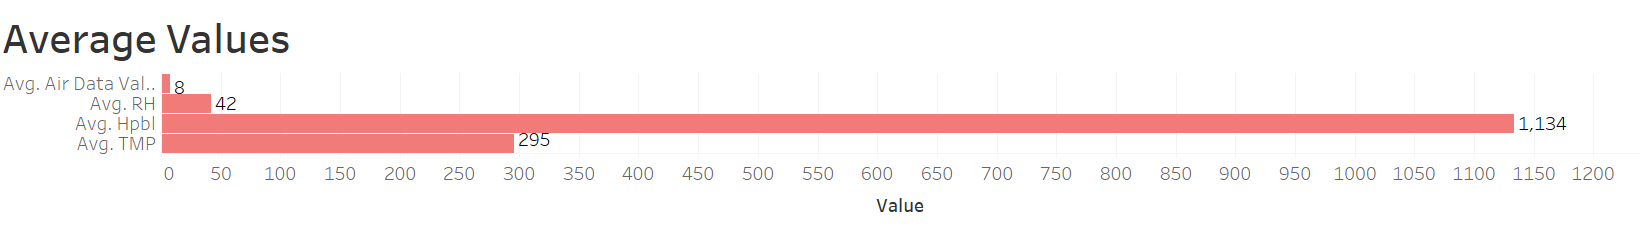

In [ ]:
# Dropping Duplicates and Missing Values
df=df.drop(df.columns[:3], axis=1)
df = df.drop_duplicates()
df = df.dropna()
df.count()

air_data_value      31570
RH                  31570
UGRD                31570
VGRD                31570
HPBL                31570
TMP                 31570
goes_measurement    31570
dtype: int64

In [ ]:
# Removing Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

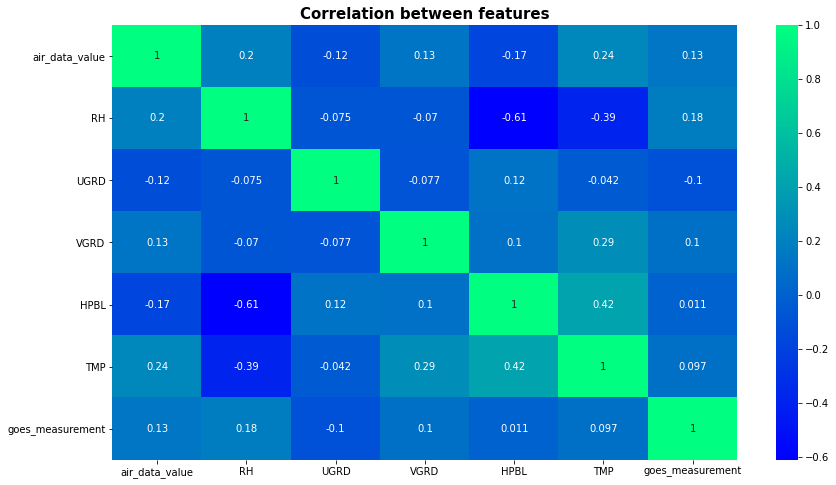

In [ ]:
df_corr=df.corr()
f,ax=plt.subplots(figsize=(14,8))
sns.heatmap(df_corr,cmap='winter',annot=True,)
plt.title("Correlation between features", 
          weight='bold', 
          fontsize=15)
plt.show()

# Detection Model 

We are building a detection model with target variable as Temperature. Here we study variation of data with temperature.

In [ ]:
target = 'TMP'
X = df[[ 'air_data_value', 'RH','UGRD','VGRD','goes_measurement', 'HPBL']].values
y = df['TMP'].values

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [ ]:
#Train test spilt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(21206, 6) (21206, 1)
(5302, 6) (5302, 1)


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linear = LinearRegression()
linear.fit(X_train, y_train)
y_test_predict = linear.predict(X_test)
y_train_predict= linear.predict(X_train)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


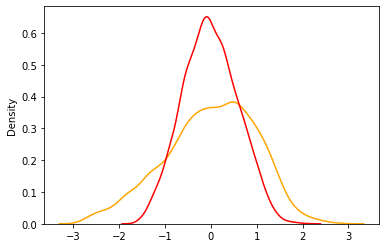

In [ ]:
sns.distplot(y_test,label='Actual Data',color='orange',bins=50,hist=False)
sns.distplot(y_test_predict,label='Predicted',color='red',bins=50,hist=False)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

print('mean_squared_error_y_test: ',mean_squared_error(y_test,y_test_predict))
print('r2_score_y_test: ',r2_score(y_test,y_test_predict))
print('mean_absolute_error_y_test: ',mean_absolute_error(y_test,y_test_predict))

mean_squared_error_y_test:  0.6203727818070891
r2_score_y_test:  0.3675960929377047
mean_absolute_error_y_test:  0.6290159464252563


## Random Forest Regression

In [ ]:
# Fitting Random Forest Regression to the dataset 

from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators= 100,random_state=42)
regressor.fit(X_train, y_train.ravel()) 
y_test_predict = regressor.predict(X_test)
y_train_predict= linear.predict(X_train)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


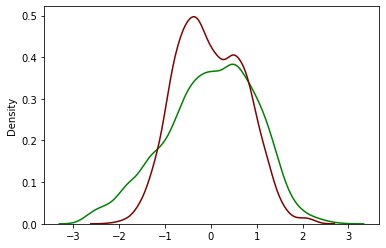

In [ ]:
sns.distplot(y_test,label='Actual Data',color='green',bins=50,hist=False)
sns.distplot(y_test_predict,label='Predicted',color='maroon',bins=50,hist=False)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

print('mean_squared_error_y_test: ',mean_squared_error(y_test,y_test_predict))
print('r2_score_y_test: ',r2_score(y_test,y_test_predict))
print('mean_absolute_error_y_test: ',mean_absolute_error(y_test,y_test_predict))

mean_squared_error_y_test:  0.40914418702674327
r2_score_y_test:  0.5829211241765955
mean_absolute_error_y_test:  0.48534419528690204


## Decision Tree Regressor

In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
regr_1 = DecisionTreeRegressor(max_depth=15)
regr_2 = DecisionTreeRegressor(max_depth=20)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred1 = regr_1.predict(X_test)
y_pred2 = regr_2.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

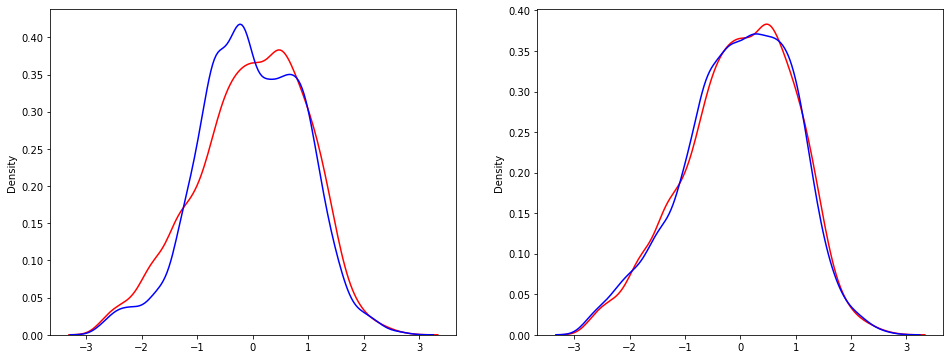

In [ ]:
plt.figure(figsize=(16,6))
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(y_test,label='Actual Data',color='red',hist=False)
sns.distplot(y_pred1,label='Predicted',color='blue',hist=False)

ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(y_test,label='Actual Data',color='red',hist=False)
sns.distplot(y_pred2,label='Predicted',color='blue',hist=False)

In [ ]:
print('mean_squared_error max depth  15: ',mean_squared_error(y_test,y_pred1))
print('r2_score max depth 15: ',r2_score(y_test,y_pred1))
print('RMSE max depth 15: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))
print('\n')
print('mean_squared_error for max depth 20: ',mean_squared_error(y_test,y_pred2))
print('r2_score max depth 20: ',r2_score(y_test,y_pred2))
print('RMSE max depth 20: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))



mean_squared_error max depth  15:  0.6993527120259218
r2_score max depth 15:  0.28708447489990896
RMSE max depth 15:  0.8362731085153472


mean_squared_error for max depth 20:  0.8100334077235268
r2_score max depth 20:  0.17425730638415027
RMSE max depth 20:  0.9000185596550367


# **Solution**



*   Prepare a paint with artificial chloroplast as one of its constituent element.

*   Tint the paint on any outer surfaces like buildings, cars, etc.
*   Chloroplast will capture carbondioxide from the atmosphere. Further, it may be possible that it releases oxygen in presence of sunlight.


*   It can be used with basic knowledge and economically feasible.



![alt](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/Hill_reaction_1.png/440px-Hill_reaction_1.png)

# **Thank You**